# MTH9879 Homework 6
#### Name: ShengQuan Zhou

Assigned: March 21, 2017.
Due: April 4, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Download RV estimator code

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

### 1. (12 points) 
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

In [2]:
load('tq.rData')
library(highfrequency)
source('RvEstimators.R')

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

(b) Repeat part (a) for the BAC mid-quote series.

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

#### Solution (a):

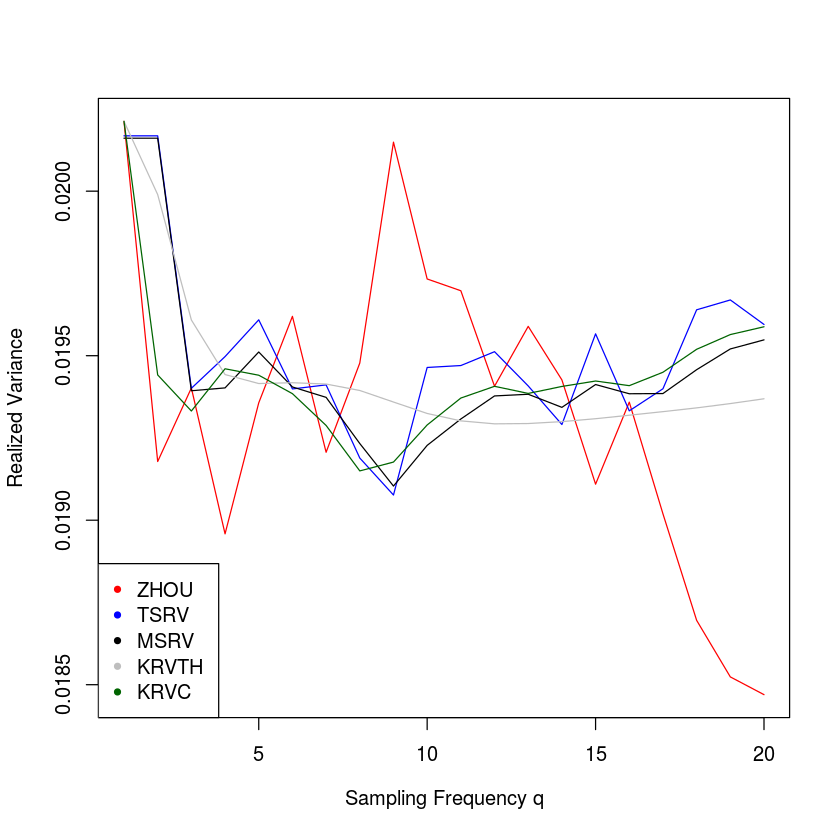

In [33]:
# logarithmic price
p <- log(as.numeric(tqBAC$PRICE))
# maximum frequency
qmax <- 20
rvZHOU <- sapply(1:qmax, function(q){sqrt(ZHOU(p,q))})
rvTSRV <- sapply(1:qmax, function(q){sqrt(TSRV(p,q))})
rvMSRV <- sapply(1:qmax, function(q){sqrt(MSRV(p,q))})
rvKRVTH <- sapply(1:qmax, function(q){sqrt(KRVTH(p,q))})
rvKRVC <- sapply(1:qmax, function(q){sqrt(KRVC(p,q))})
plot(1:20,rvZHOU,col="red",type="l",xlab=expression("Sampling Frequency q"), ylab = "Realized Variance")
lines(rvTSRV,col="blue")
lines(rvMSRV,col="black")
lines(rvKRVTH,col="gray")
lines(rvKRVC,col="dark green")
legend("bottomleft", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),col=c("red","blue","black","gray","dark green"),pch=20)

#### Solution (b):

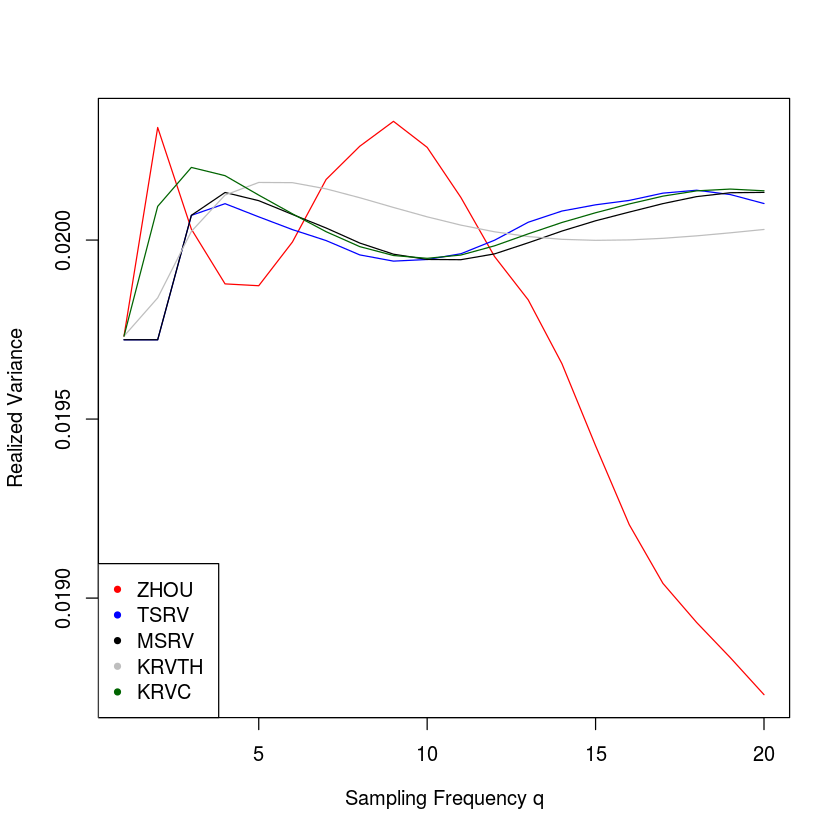

In [34]:
midQuote <- log((as.numeric(tqBAC$BID) + as.numeric(tqBAC$OFR))/2)
qmax <- 20
rvMidZHOU <- sapply(1:qmax, function(q){sqrt(ZHOU(midQuote,q))})
rvMidTSRV <- sapply(1:qmax, function(q){sqrt(TSRV(midQuote,q))})
rvMidMSRV <- sapply(1:qmax, function(q){sqrt(MSRV(midQuote,q))})
rvMidKRVTH <- sapply(1:qmax, function(q){sqrt(KRVTH(midQuote,q))})
rvMidKRVC <- sapply(1:qmax, function(q){sqrt(KRVC(midQuote,q))})
plot(1:20,rvMidZHOU,col="red",type="l",xlab=expression("Sampling Frequency q"), ylab = "Realized Variance")
lines(rvMidTSRV,col="blue")
lines(rvMidMSRV,col="black")
lines(rvMidKRVTH,col="gray")
lines(rvMidKRVC,col="dark green")
legend("bottomleft", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),col=c("red","blue","black","gray","dark green"),pch=20)

#### Solution (c):

(1) The estimator using mid-quote series is recommended as it avoids the bid-ask bounce in trade price series.

(2) The KRVTH estimator appears to have the smoothest signature plot.


(3) Sub-sampling once every 5 trades or quotes are recommended based on the above graphs as the realized variance appears to stablize around $q=5$.

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [36]:
load('tq.rData')
library(highfrequency)
library(quantmod)

(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.

(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?

(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

#### Solution (a):

In [74]:
tqAggregate <- function(tq,k)
{
    return(aggregatets(tq,on="seconds",k=k))
}

#### Solution (b):

In [76]:
logReturnCorr <- function(tq1,tq2)
{
    logReturn1 <- diff(log(as.numeric(tq1$PRICE)))
    logReturn2 <- diff(log(as.numeric(tq2$PRICE)))
    return(cor(logReturn1,logReturn2))
}

#### Solution (c):

In [78]:
aggregateLogReturnCorr <- function(tq1, tq2, k)
{
    aggregateLogReturn1 <- tqAggregate(tq1, k)
    aggregateLogReturn2 <- tqAggregate(tq2, k)
    return(logReturnCorr(aggregateLogReturn1, aggregateLogReturn2))
}

In [79]:
aggregateCorr <- function(k)
{
    return(aggregateLogReturnCorr(tqBAC, tqC, k))
}

In [80]:
corrAggregation <- sapply(2:600, aggregateCorr)

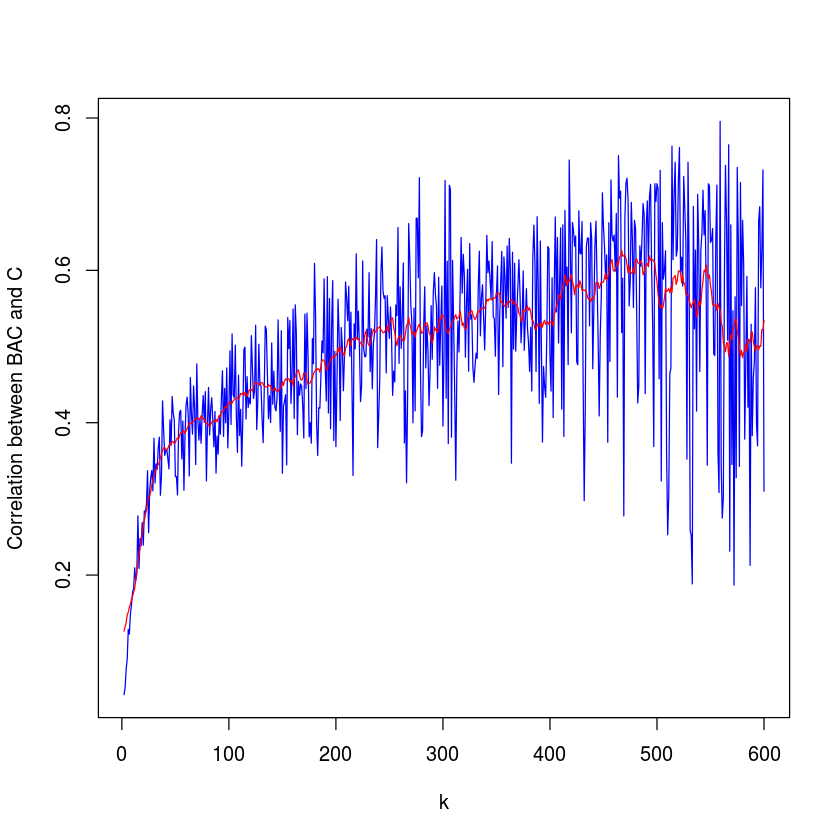

In [84]:
plot(2:600,corrAggregation,ylab="Correlation between BAC and C",xlab="k",type="l", col="blue")
lines(ksmooth(2:600,corrAggregation,bandwidth=20),col="red")

#### Solution (d):

According to Wikipedia, in econometrics and time series analysis, the Epps effect, named after T. W. Epps, is the phenomenon that the empirical correlation between the returns of two different stocks decreases as the sampling frequency of data increases. The above plot is consistent with the Epps effect: the correlation between BAC and C approaches zero as the sample frequency $\frac{1}{k}$ increases.

The correlation between BAC and C are approximately 0.4$\sim$0.6, where the data is for 2012/05/04.

#### Solution (e):

In [90]:
getSymbols("BAC",src="yahoo",from="2012-01-01",to="2012-12-31","getSymbols.warning4.0"=FALSE)
getSymbols("C",src="yahoo",from="2012-01-01",to="2012-12-31")
cat("Historical Correlation is: ", cor(diff(log(as.numeric(BAC$BAC.Adjusted))),diff(log(as.numeric(C$C.Adjusted)))))

[1] "BAC"

[1] "C"

Historical Correlation is:  0.7999082

## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

#### Solution:

The Hayashi-Yoshida estimator

$$
HY_t = \sum _ {i\le t}\sum _ {j\le t} (p^{(1)} _ i - p ^ {(1)} _ {i-1})(p^{(2)} _ j - p^{(2)} _ {j-1})v _ {ij},
$$
where 
$$
v _ {ij} = \mathbb{1} _ {[t _ {i-1},t_i]\cap [t _ {j-1},t_j]\neq \varnothing}.
$$
When $p ^ {(1)}$ and $p ^ {(2)}$ are synchronous, $[t _ {i-1},t_i]\cap [t _ {j-1},t_j] = [t _ {i-1},t_i]$ when $i=j$; otherwise, $[t _ {i-1},t_i]\cap [t _ {j-1},t_j] = \varnothing$ when $i\neq j$. Thus,
$$
HY_t = \sum _ {i\le t}\sum _ {j\le t} (p^{(1)} _ i - p ^ {(1)} _ {i-1})(p^{(2)} _ j - p^{(2)} _ {j-1})v _ {ij}
= \sum _ {i\le t} (p^{(1)} _ i - p ^ {(1)} _ {i-1})(p^{(2)} _ i - p^{(2)} _ {i-1})
$$
which is by definition the realized covariance estimator.

## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [91]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [92]:
data.frame(head(spx.krv))

,head.spx.krv.
2000-01-03,0.0001607266
2000-01-04,0.0002643965
2000-01-05,0.0003046503
2000-01-06,0.0001485821
2000-01-07,0.0001232670
2000-01-10,0.0001306934


### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.


#### Solution (a):

Use the code from Lecture 6.

In [95]:
data(realized_library);
data.frame(head(realized_library))

,Dow.Jones.Industrials.Returns,Dow.Jones.Industrials.Realized.Variance,Dow.Jones.Industrials.Realized.Kernel,CAC.40.Returns,CAC.40.Realized.Variance,CAC.40.Realized.Kernel,FTSE.100.Returns,FTSE.100.Realized.Variance,FTSE.100.Realized.Kernel,USD.Euro.Returns,USD.Euro.Realized.Variance,USD.Euro.Realized.Kernel
1996-01-03,0.001952290,1.88332e-05,1.78879e-05,0.018858352,4.30952e-05,4.41082e-05,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,-0.004888860,7.98423e-05,7.36039e-05,-0.007578393,8.08785e-05,9.07160e-05,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,0.003214874,4.20104e-05,4.09363e-05,-0.007271058,9.66174e-05,1.01892e-04,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-08,0.004388492,1.08502e-05,1.14624e-05,0.000495423,5.79063e-05,6.51420e-05,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-09,-0.011392783,3.87930e-05,3.63033e-05,-0.000745835,7.90014e-05,8.77290e-05,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-10,-0.016445693,6.57561e-05,6.20834e-05,-0.002742984,7.62029e-05,8.97537e-05,NaN,NaN,NaN,NaN,NaN,NaN


[1] ‘0.9.7’

Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16



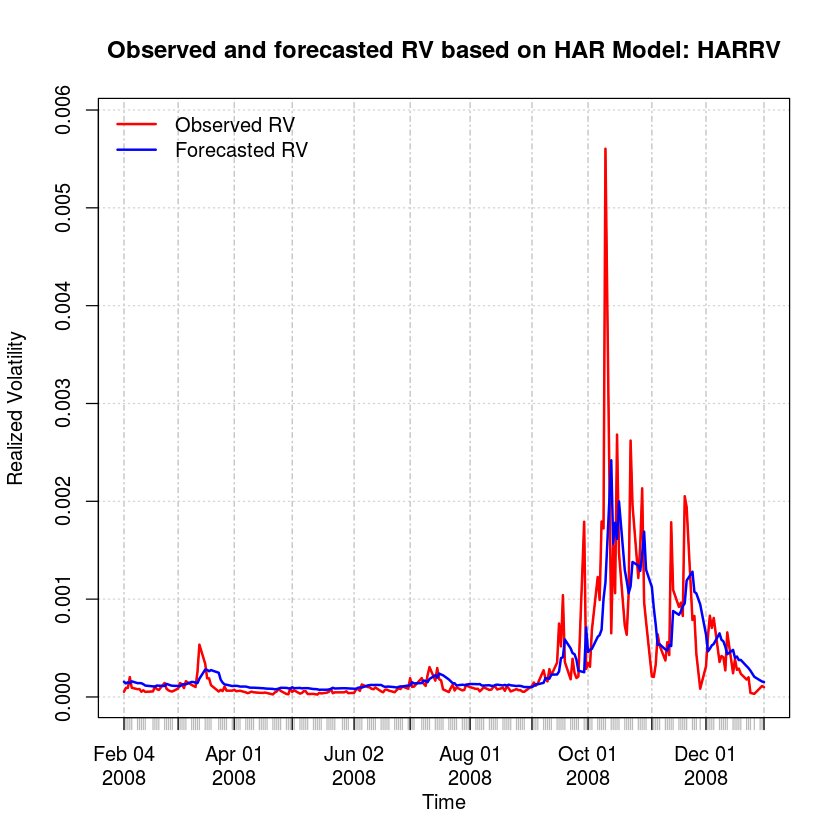

In [110]:
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance;
DJI_RV <- DJI_RV[!is.na(DJI_RV)]
DJI_RV <- DJI_RV['2008']
# 1 day, 1 week, and 1 month
dji_rv <- harModel(data=DJI_RV , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1,transform=NULL)
plot(dji_rv)
print(summary(dji_rv))

#### Solution (b):

[1] ‘0.9.7’

Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0022396 -0.0001219 -0.0000725 -0.0000176  0.0079141 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 7.164e-05  5.960e-05   1.202  0.23067    
beta1 1.523e-01  8.218e-02   1.853  0.06526 .  
beta2 5.512e-01  1.415e-01   3.896  0.00013 ***
beta3 1.501e-01  1.324e-01   1.134  0.25801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006787 on 220 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4015 
F-statistic: 50.87 on 3 and 220 DF,  p-value: < 2.2e-16



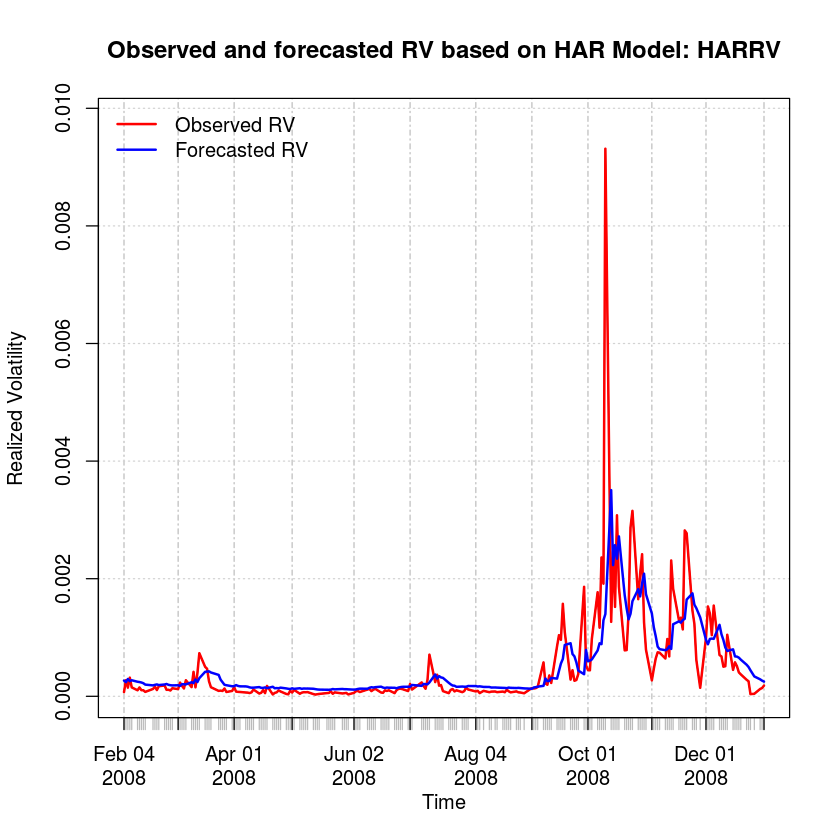

In [111]:
spx_krv <- spx.krv[!is.na(spx.krv)]
spx_krv <- spx_krv['2008']
spx_rv <- harModel(data=spx_krv , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1,transform=NULL)
plot(spx_rv)
print(summary(spx_rv))

#### Solution (c):


|       | DJI_RV   ($10^{-1}$)       | spx.krv ($10^{-1}$)  |
|-------|----------------------|-----------|
| $RV_t$   | $1.586  $ | $1.523$ |
| $RV_{t-5}$  | $6.213$ | $5.512$ |
| $RV_{t-22}$ | $0.8721$ | $1.501$ |

The results for DJI_RV and spx.krv are similar. The most weights are on weekly RV corresponding to $RV_{t-5}$.

#### Solution (d):

According to Wikipedia, VIX is the ticker symbol for the CBOE Volatility Index, a popular measure of the implied volatility of S&P 500 index options, calculated and published by the Chicago Board Options Exchange (CBOE). It is colloquially referred to as the fear index or the fear gauge.

In [102]:
library(quantmod)

In [108]:
getSymbols("^VIX",src="yahoo",from="2008-01-01",to="2008-12-31")

[1] "VIX"

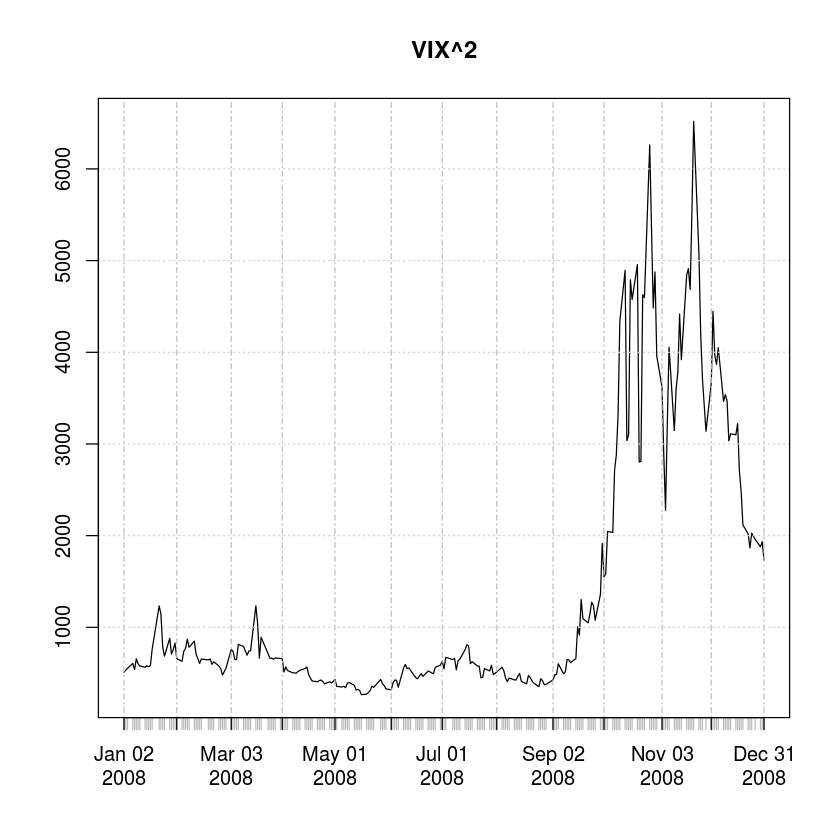

In [109]:
plot(VIX^2)

#### Solution (e):

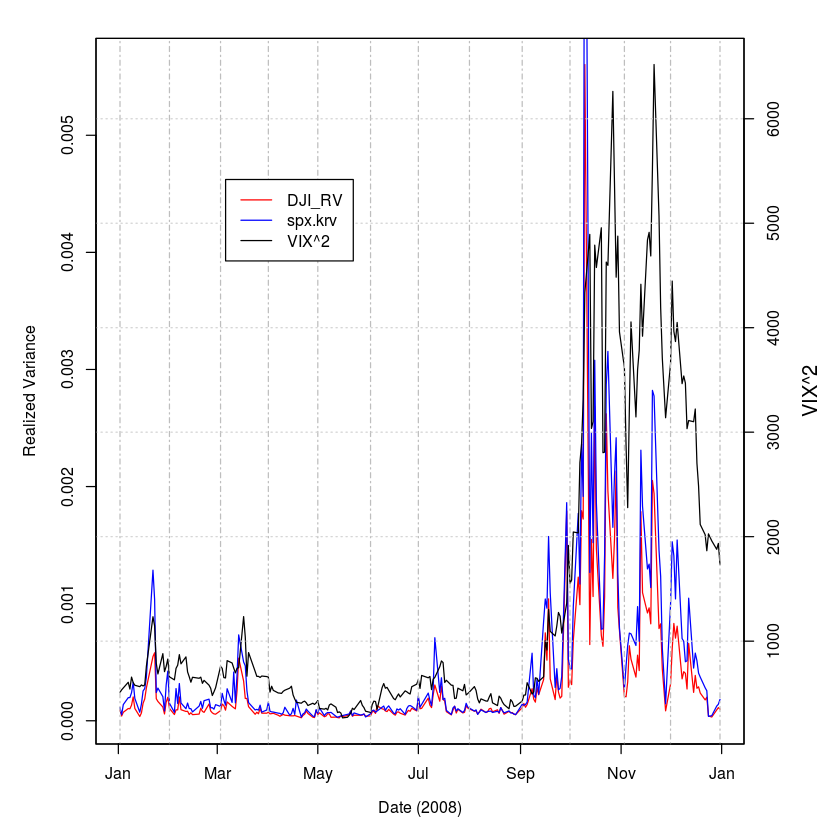

In [146]:
# Use the method given in Lecture #6 "BAC volume and realized variance profile" to draw the graph
par(mar = c(5,5,2,5),cex=0.8) 
plot(as.Date(row.names(data.frame(DJI_RV))), DJI_RV, col="red",type="l", xlab=expression("Date (2008)"), ylab = "Realized Variance")
lines(as.Date(row.names(data.frame(spx_krv))), spx_krv, col="blue",type="l")
par(new = T)
plot(VIX^2, col="black",type="l", axes = F, xlab = NA, ylab = NA, main = NA)
axis(side=4)
mtext(side=4, line=3, "VIX^2")
legend("topleft",inset=0.2,legend=c("DJI_RV","spx.krv","VIX^2"),col=c("red","blue","black"),lwd=c(1,1,1))

- According to the above plot, the implied volatility index VIX$^2$ roughly follows a similar pattern of that of the realized variance of Dow Jones and S&P 500. The former seems to slightly lag for a month relative to the latter, indicating that the implied volatility recovers from the spikes more slowly than the realized variance.
- S&P 500 exhibits a higher realized variance than Dow Jones. This is because, on average, the market capitalization  of stocks in S&P 500 is lower than those of Dow Jones.